<img src="https://res.cloudinary.com/teepublic/image/private/s--vLk0MTVa--/t_Resized%20Artwork/c_fit,g_north_west,h_954,w_954/co_000000,e_outline:48/co_000000,e_outline:inner_fill:48/co_ffffff,e_outline:48/co_ffffff,e_outline:inner_fill:48/co_bbbbbb,e_outline:3:1000/c_mpad,g_center,h_1260,w_1260/b_rgb:eeeeee/c_limit,f_auto,h_630,q_90,w_630/v1537795965/production/designs/3204818_0.jpg" alt="Drawing" style="width: 200px; Float: right"/>("credit : https://www.teepublic.com/user/dr_squirrel")


## Zombie alpca 
### Collaborators: Arian Andalib, Elias Taira, Xiaoyanbin Cai,  <br>   Caroline VanDenBrouck,  Noah De Guzman

### Introduction
#### This is a simulation that regards the interaction of zombies vs humans. We will try to have zombies interact with humans. The humans gaining the ability to fight back. The humans getting the abilty to train to improve the chances of winning. We will plot the results of how diffrent change affect the simulation. 

### Disclousure: This is not a guide on how to survive the zombie apocolypse!!! Good night and Good luck. 

### Basic simulation

In [7]:
# importing necessary libraries and classes
import matplotlib.pyplot as plt
import numpy as np

%reload_ext autoreload
%autoreload 2
%pylab
%matplotlib inline

from IPython.display import display, clear_output

from zombie_model_base import human, zombie, alpacalypse

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


The following is a basic simulation that simply adapts our 'standard_model.py' code into a zombie apocalypse model. There are no real special behaviors in the humans or the zombies. They merely randomly wander around at similar speeds and if they interact one another, the human becomes a zombie.

Check 'zombie_model.py' for more specifics on how each of the functions work and how one might add other behaviors to the model

In [8]:
my_alpaca = alpacalypse(width = 200 , height = 200) # initializing apocolypse class

np.random.seed(123456789)

# Initializing a bunch of humans and zombies
for p in range(200):
    my_alpaca.humans.append(
        human()
    )

    my_alpaca.zombies.append(
        zombie()
    )

# Group both sets of entities in one list
my_alpaca._all_entities = [*my_alpaca.humans, *my_alpaca.zombies]

print("Done")

Done


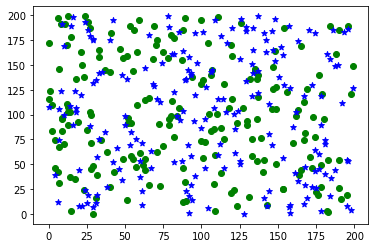

In [9]:
# Testing to see if the '.place_at' and '.draw()'functions work

for hum in my_alpaca.humans:
    hum.place_at([np.random.randint(low = 0, high = my_alpaca.width),np.random.randint(low = 0, high = my_alpaca.height)])
    
for zom in my_alpaca.zombies:
    zom.place_at([np.random.randint(low = 0, high = my_alpaca.width),np.random.randint(low = 0, high = my_alpaca.height)])
my_alpaca.draw()

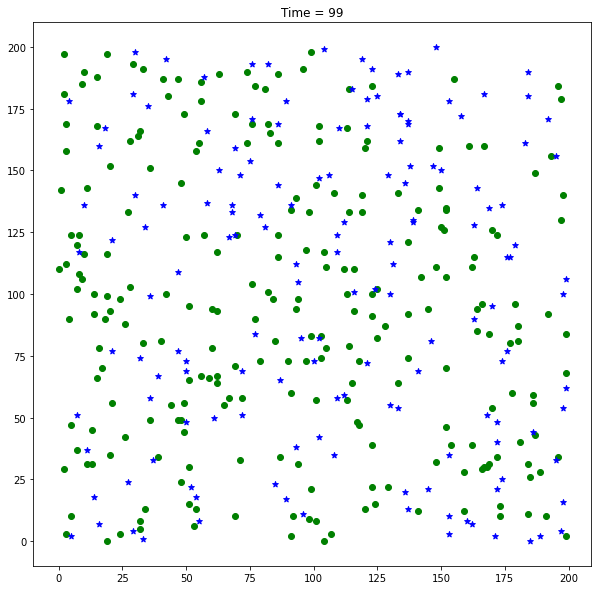

Total time = 776.7784669399261


<Figure size 720x720 with 0 Axes>

In [10]:
# Using the animation code from HW2

fig, ax = plt.subplots(figsize = (10,10))

start = time.time()
times = []

for i in range(100):
    
    # RUN YOUR ABM
    my_alpaca.evolve()
    my_alpaca.draw()
    
    # same animation code we used in hw2
    plt.title(f"Time = {i}")
    clear_output(wait=True) 
    display(fig)            
    fig.clear()             
        
    end = time.time()
    times.append(end-start)
    
print("Total time =", end-start)    

In [11]:
# Sometimes I get a bit of an odd discrepancy between the number of infected zombies and the number of created zombies
print("The number of humans to be turned into zombies was",200 - len(my_alpaca.humans))
print("The number of zombies that were created was",len(my_alpaca.zombies)-200)

The number of humans to be turned into zombies was 46
The number of zombies that were created was 46


### Ability to smell humans
#### The zombies have better path finding implements the ants smell in the zombie simulation/

In [3]:
%reload_ext autoreload
%autoreload 2
%pylab
%matplotlib inline

from IPython.display import display, clear_output

from zombie_model import human, zombie, alpacalypse # importing necessary classes

my_alpaca_smell = alpacalypse(width = 200 , height = 200) # initializing apocolypse class

np.random.seed(123456789)

# Initializing a bunch of humans and zombies
for p in range(200):
    my_alpaca_smell.humans.append(
        human(base_chance_of_survival = 0) # setting smell radius to -1 to 
                                            # isolate desired features (zombie scent)
    )

    my_alpaca_smell.zombies.append(
        zombie(smell_radius = 10)
    )

# Group both sets of entities in one list
my_alpaca_smell._all_entities = [*my_alpaca_smell.humans, *my_alpaca_smell.zombies]

print("Done")

for hum in my_alpaca_smell.humans:
    hum.place_at([np.random.randint(low = 0, high = my_alpaca_smell.width),np.random.randint(low = 0, high = my_alpaca_smell.height)])
    
for zom in my_alpaca_smell.zombies:
    zom.place_at([np.random.randint(low = 0, high = my_alpaca_smell.width),np.random.randint(low = 0, high = my_alpaca_smell.height)])

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib
Done


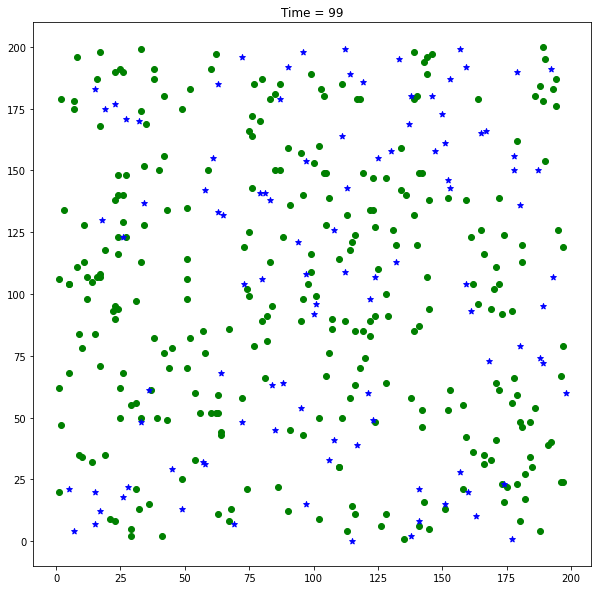

Total time = 227.10365319252014


<Figure size 720x720 with 0 Axes>

In [4]:
fig, ax = plt.subplots(figsize = (10,10))

start = time.time()
times = []

for i in range(100):
    
    # RUN YOUR ABM
    my_alpaca_smell.evolve()
    my_alpaca_smell.draw()
    
    # same animation code we used in hw2
    plt.title(f"Time = {i}")
    clear_output(wait=True) 
    display(fig)            
    fig.clear()             
        
    end = time.time()
    times.append(end-start)
    
print("Total time =", end-start)

In [37]:
print("The number of humans to be turned into zombies was",200 - len(my_alpaca_smell.humans))
print("The number of zombies that were created was",len(my_alpaca_smell.zombies)-200)

The number of humans to be turned into zombies was 96
The number of zombies that were created was 96


### Ability to fight back and tain
#### Humans have a set chance of surviving a zombie attack by killing the zombie
#### After each zombie attack a human will improve their chances of survival

In [38]:
%reload_ext autoreload
%autoreload 2
%pylab
%matplotlib inline

my_alpaca = alpacalypse(width = 200 , height = 200) # initializing apocolypse class

np.random.seed(123456789)

# Initializing a bunch of humans and zombies
for p in range(200):
    my_alpaca.humans.append(
        human(base_chance_of_survival = 1)
    )

    my_alpaca.zombies.append(
        zombie(smell_radius = 0) # setting smell radius to 0 to isolate desired features
    )

# Group both sets of entities in one list
my_alpaca._all_entities = [*my_alpaca.humans, *my_alpaca.zombies]

print("Done")

for hum in my_alpaca.humans:
    hum.place_at([np.random.randint(low = 0, high = my_alpaca.width),np.random.randint(low = 0, high = my_alpaca.height)])
    
for zom in my_alpaca.zombies:
    zom.place_at([np.random.randint(low = 0, high = my_alpaca.width),np.random.randint(low = 0, high = my_alpaca.height)])

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib
Done


In [39]:
fig, ax = plt.subplots(figsize = (10,10))

start = time.time()
times = []

for i in range(100):
    
    # RUN YOUR ABM
    my_alpaca.evolve()
    my_alpaca.draw()
    
    # same animation code we used in hw2
    plt.title(f"Time = {i}")
    clear_output(wait=True) 
    display(fig)            
    fig.clear()             
        
    end = time.time()
    times.append(end-start)
    
print("Total time =", end-start)

Total time = 24.301711320877075


In [40]:
print("The number of humans to be turned into zombies was",200 - len(my_alpaca.humans))
print("The number of zombies that were created was",len(my_alpaca.zombies)-200)

The number of humans to be turned into zombies was 30
The number of zombies that were created was -7


### Plotting the implements
#### Plot each version we have made above for number of zombies vs humans 

### conclusions
#### What do the plots show? What are the patterns? Is there any way to shift these parameters.

## Extra-Credit (time applicable)

### The zombies evolve
#### Zombies evolve by after n iterations  the probailty to get a human changes.

### Getting weapons
#### implement weapons that increase the chance of success. This maybe by random chance to find a weapon.

### The pacifist
#### Heal zombies the zombies and turn them back.